In [4]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Get 2nd order equations of the HQ curves (Heart Mate III) for different RPMs. 



<img src="../res/HQ-curve-HMIII.png" width="60%"/>

# Curve coefficients

#### Report data points


In [5]:
# Dictionnary: RPM [int] -> data [list of xs [list] and ys[list] ]
# x = Q, y = P
data = {}

In [6]:
data[3000] = [
    [0.0, 1.0, 2.0, 2.9], # flow
    [32,  29, 23, 14],   # pressure
]

In [7]:
data[4000] = [
    [0.0, 2.0, 3.0, 4.5],
    [58,  49,  41,  16]
]

In [8]:
data[5000] = [
    [0.0, 2.0, 4.0, 6.0],
    [90,  80,  63,  19]
]

In [9]:
data[6000] = [
    [0.0, 2.0, 4.0, 6.0, 7.0, 7.4],
    [131, 120, 105, 70,  36,  22]
]

In [10]:
data[7000] = [
    [0.0, 2.0, 4.0, 5.0, 8.0],
    [177, 168, 150, 140, 63]
]

In [11]:
data[8000] = [
    [0.0, 2.0, 3.0, 5.0, 6.0, 8.0, 10.0],
    [232, 220, 211, 191, 178, 126, 43]
]

In [12]:
data[9000] = [
    [0.0, 2.0, 4.0, 6.0, 9.0, 10.0, 11.0],
    [290, 278, 263, 240, 164, 125,  72]
]

#### Adjust units

The reported data is in $L/min$, while the model assumes $ml/s$. Thus we have to multiply every measure of $Q$ by $1000/60$.

In [13]:
for RPM in data:
    data[RPM] = np.array(data[RPM])
    data[RPM][0] = data[RPM][0] * 1000 / 60

## Fit polynomials


#### Procedure 

1. We reconstruct the HQ curve with the same axes as the original plot, as a mean of comparison
2. We reconstruct the HQ curve with **inverted axes**,
    * i.e. we perform polynomial regression with P as the input and Q as the output

#### Demo

[ 1.22017354  0.11388286 -0.0835141 ]


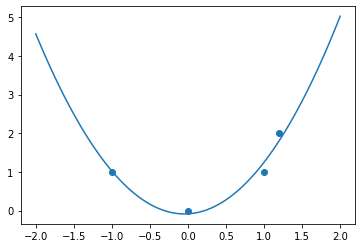

In [14]:
# Demo numpy.polyfit: f(x)=x^2
x = [-1,0,1, 1.2]
y = [1,0,1, 2]
coefs = np.polyfit(x, y, 2)
coefs # order: x^n, x^n-1, ..., x^1, x^0
print(coefs)
plt.scatter(x, y)
x = np.linspace(-2, 2, 100)
plt.plot(x, np.polyval(coefs, x));

#### Compute coefficients

In [15]:
# Pressure in function of flow
coefs = {}
# Flow in function of pressure
coefs_rev = {}

for k in data:
    x = data[k][0]
    y = data[k][1]
    coefs[k] = np.polyfit(x, y, deg=2)
    coefs_rev[k] = np.polyfit(y, x, deg=2)

In [16]:
coefs

{3000: array([-6.41965766e-03, -5.96681677e-02,  3.19451487e+01]),
 4000: array([-7.71827707e-03,  2.58323632e-02,  5.77991851e+01]),
 5000: array([-7.65e-03,  7.50e-02,  8.90e+01]),
 6000: array([-8.36547556e-03,  1.92188722e-01,  1.28446363e+02]),
 7000: array([-7.16105290e-03,  1.20669563e-01,  1.75321748e+02]),
 8000: array([-7.83343555e-03,  2.41598816e-01,  2.25995876e+02]),
 9000: array([-7.58147075e-03,  2.83673726e-01,  2.83909077e+02])}

In [17]:
coefs_rev

{3000: array([-0.12205387,  3.00925926, 29.88636364]),
 4000: array([-4.88034086e-02,  1.84837429e+00,  5.77709507e+01]),
 5000: array([-2.45944445e-02,  1.29678032e+00,  8.40811870e+01]),
 6000: array([-1.21526186e-02,  8.19382568e-01,  1.07021624e+02]),
 7000: array([-1.37201995e-02,  2.16110226e+00,  5.14744398e+01]),
 8000: array([-5.53127232e-03,  7.05034781e-01,  1.43812490e+02]),
 9000: array([-4.29159884e-03,  8.05248158e-01,  1.41178920e+02])}

#### HQ plot

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
Qmax = 12 * 1000/60
Q = np.linspace(0, Qmax, 1000)

for RPM, coef in coefs.items():
    plt.scatter(data[RPM][0], data[RPM][1])
    plt.plot(Q, np.polyval(coef, Q))

plt.xlim(0, Qmax); plt.ylim(0, 300); plt.grid(ls='--');
plt.xlabel("Flow Q [ml/s]"); plt.ylabel("Pressure head dP [mmHg]");
plt.title("Reconstructed HQ curve");

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
for RPM, coef in coefs_rev.items():
    pmin = min(data[RPM][1])
    pmax = max(data[RPM][1])
    dP = np.linspace(pmin, pmax, 1000)
    Q = np.polyval(coef, dP)
    plt.scatter(data[RPM][1], data[RPM][0])
    plt.plot(dP, Q, label=RPM)
    
plt.xlabel("Pressure head dP [mmHg]"); plt.ylabel("Flow Q [ml/s]"); plt.legend();
plt.grid(ls='--'); plt.title("Q as function of pressure head dP");

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />